<a href="https://colab.research.google.com/github/AgnosticRohan/CodSoft/blob/main/Task_1_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.**

In [ ]:
#importing the libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the file
Titanic= pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')

In [ ]:
#FIRST 5 ROWS OF THE TITANIC DATASET

Titanic.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#LAST 5 ROWS OF THE TITANIC DATASET
Titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#REMOVING THE NULL VALUES AND MISSSING VALUES PRESENT IN DATA
Titanic=Titanic.drop(columns='Cabin',axis=1)

In [ ]:
# FILLING MISSING VALUES IN THE "EMBARKED " WITH MODE
Titanic['Embarked'].fillna(Titanic['Embarked'].mode()[0], inplace=True)

In [ ]:
#FILLING MISSING VA;LUES IN "AGE" WITH HELP  OF MEAN

Titanic['Age'].fillna(Titanic['Age'].mean(),inplace=True)


In [ ]:
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


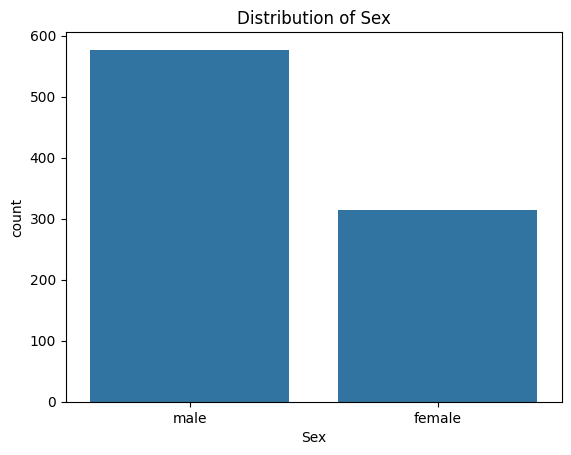

In [ ]:
plt.figure()
sns.countplot(data=Titanic, x='Sex')
plt.title('Distribution of Sex')
plt.show()

In [ ]:
Titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

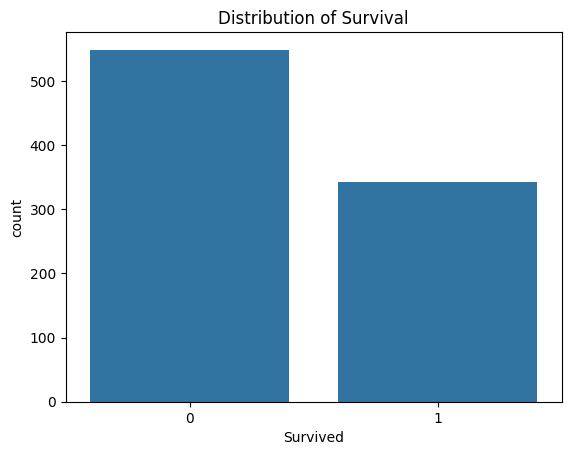

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
plt.figure()
sns.countplot(data=Titanic, x='Survived')
plt.title('Distribution of Survival')
plt.show()
Titanic['Survived'].value_counts()

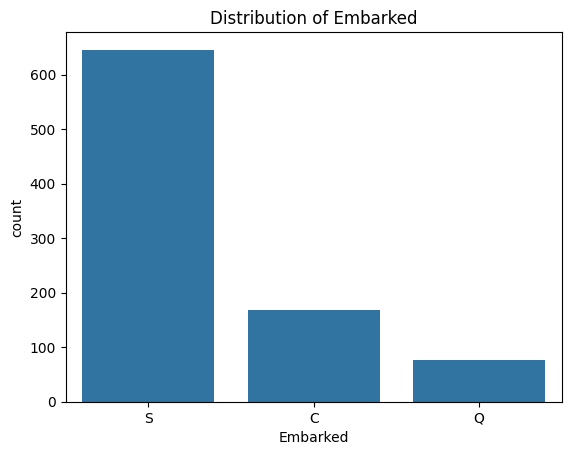

In [ ]:
plt.figure()
sns.countplot(data=Titanic, x='Embarked')
plt.title('Distribution of Embarked')
plt.show()

In [ ]:



Titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

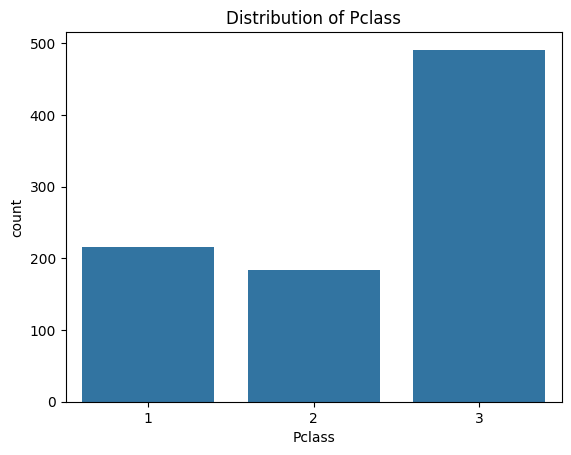

In [ ]:
plt.figure()
sns.countplot(data=Titanic, x='Pclass')
plt.title('Distribution of Pclass')
plt.show()

In [ ]:
Titanic.value_counts('Pclass')

Pclass
3    491
1    216
2    184
dtype: int64

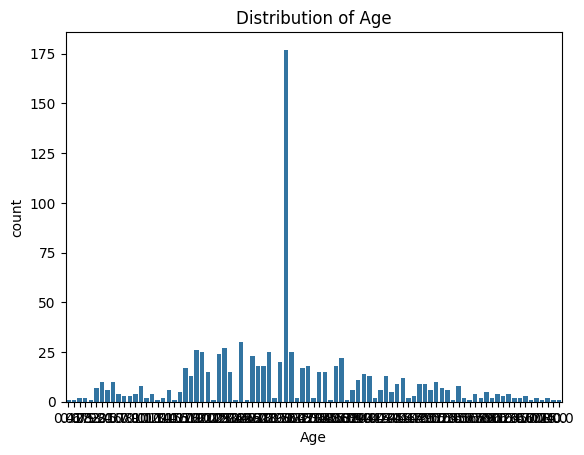

In [ ]:
plt.figure()
sns.countplot(data=Titanic, x='Age')
plt.title('Distribution of Age')
plt.show()

In [ ]:
Titanic.value_counts('Age')

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
20.500000      1
14.500000      1
12.000000      1
0.920000       1
80.000000      1
Length: 89, dtype: int64

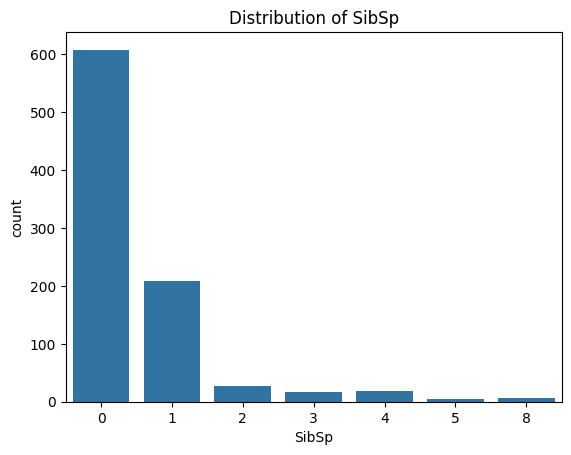

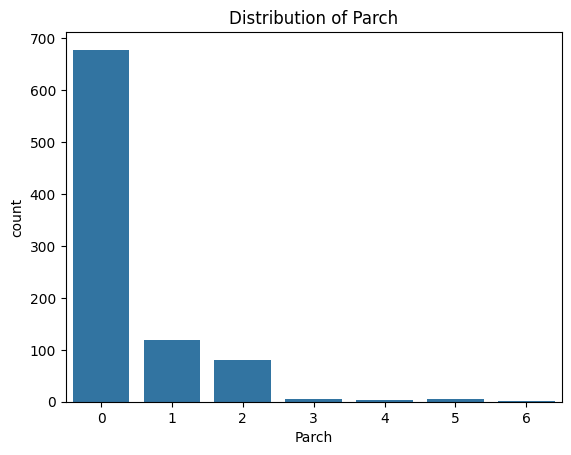

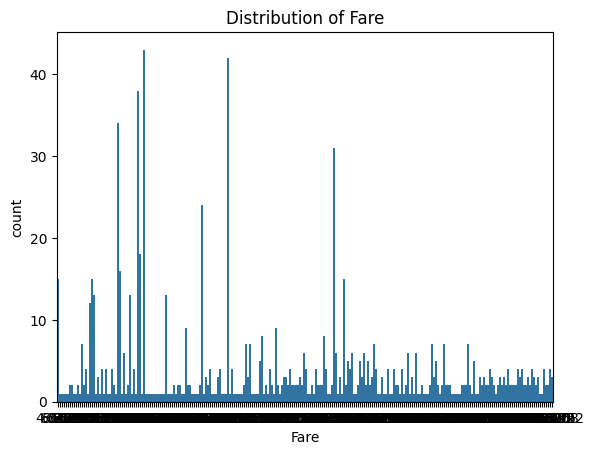

In [ ]:


# Plot distributions for numerical columns
numerical_cols = ['SibSp', 'Parch', 'Fare']
for col in numerical_cols:
    sns.countplot(data=Titanic, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()


In [ ]:

Titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
Titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
Titanic['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

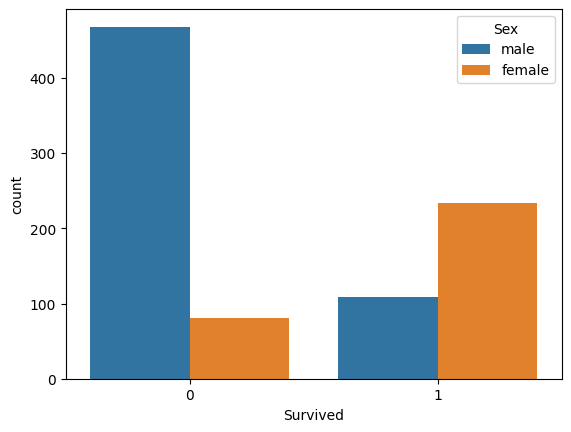

Sex       female  male
Survived              
0             81   468
1            233   109


In [ ]:
sns.countplot(x='Survived',hue="Sex",data=Titanic)
plt.show()


survival_counts = Titanic.groupby(['Survived', 'Sex']).size().unstack()
print(survival_counts)

In [ ]:
survival_counts = Titanic.groupby(['Survived', 'Sex']).size().unstack()
print(survival_counts)


Sex       female  male
Survived              
0             81   468
1            233   109


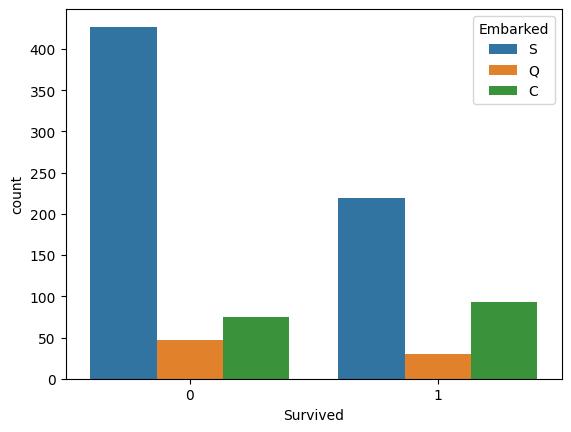

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


In [ ]:
sns.countplot(x='Survived',hue="Embarked",data=Titanic)
plt.show()



survival_counts = Titanic.groupby(['Survived', 'Embarked']).size().unstack()
print(survival_counts)


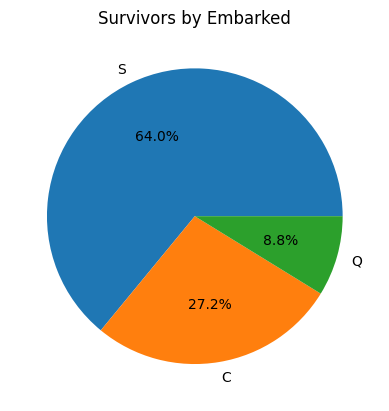

In [ ]:
survived_embarked_counts = Titanic[Titanic['Survived'] == 1]['Embarked'].value_counts()
plt.figure()
plt.pie(survived_embarked_counts, labels=survived_embarked_counts.index, autopct='%1.1f%%')
plt.title('Survivors by Embarked')
plt.show()

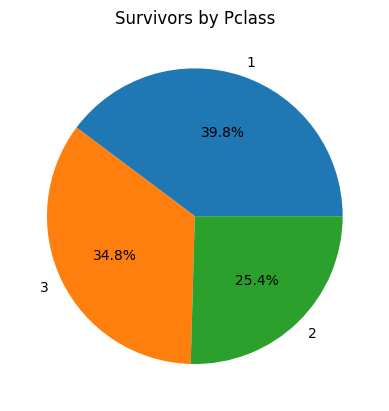

In [ ]:
survived_pclass_counts = Titanic[Titanic['Survived'] == 1]['Pclass'].value_counts()
plt.figure()
plt.pie(survived_pclass_counts, labels=survived_pclass_counts.index, autopct='%1.1f%%')
plt.title('Survivors by Pclass')
plt.show()

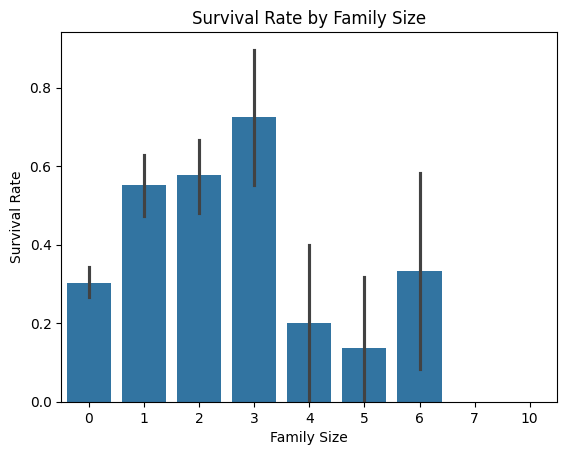

In [ ]:
# Create a new feature 'FamilySize' representing the total number of family members
Titanic['FamilySize'] = Titanic['SibSp'] + Titanic['Parch']

# Analyze the survival rate based on the presence of family members
sns.barplot(x='FamilySize', y='Survived', data=Titanic)
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.show()


In [ ]:
print("Value Counts for FamilySize:")
print(Titanic['FamilySize'].value_counts())


Value Counts for FamilySize:
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64


In [ ]:
Titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':1,'C':1,'Q':2}},inplace=True)

In [ ]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1,0


In [ ]:
X = Titanic.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=Titanic['Survived']

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  FamilySize
0         3    0  22.000000      1      0   7.2500         1           1
1         1    1  38.000000      1      0  71.2833         1           1
2         3    1  26.000000      0      0   7.9250         1           0
3         1    1  35.000000      1      0  53.1000         1           1
4         3    0  35.000000      0      0   8.0500         1           0
..      ...  ...        ...    ...    ...      ...       ...         ...
886       2    0  27.000000      0      0  13.0000         1           0
887       1    1  19.000000      0      0  30.0000         1           0
888       3    1  29.699118      1      2  23.4500         1           3
889       1    0  26.000000      0      0  30.0000         1           0
890       3    0  32.000000      0      0   7.7500         2           0

[891 rows x 8 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(891, 8) (712, 8) (179, 8)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 

In [ ]:
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy Score of training data:',training_data_accuracy)

Accuracy Score of training data: 0.8019662921348315


In [ ]:
X_test_prediction = model.predict(X_test)

In [ ]:
print(X_test_prediction)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [ ]:
testing_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy Score of training data:',testing_data_accuracy)

Accuracy Score of training data: 0.8156424581005587


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)


In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Precision: 0.8059701492537313
Recall: 0.7297297297297297
F1-score: 0.7659574468085106
Confusion Matrix:
[[92 13]
 [20 54]]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Support Vector Machine', SVC()))
models.append(('K-Nearest Neighbors', KNeighborsClassifier()))


In [ ]:
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Decision Tree: 0.757101 (0.032574)
Random Forest: 0.796362 (0.034528)
Support Vector Machine: 0.672711 (0.027181)
K-Nearest Neighbors: 0.688224 (0.032937)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, Y_train)

# Evaluate the model
gb_accuracy = gb_clf.score(X_test, Y_test)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)


Gradient Boosting Classifier Accuracy: 0.8044692737430168


In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already trained the model and made predictions
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(Y_test,X_test_prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

